In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Uji Distribusi Data dengan Data Random (Nomor 2)

<Axes: ylabel='Count'>

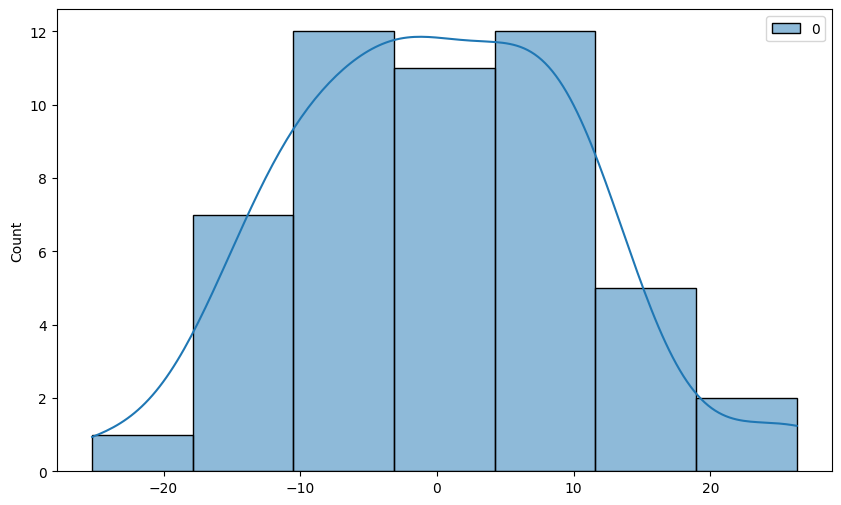

In [26]:
# Contoh data
data = pd.read_csv('random_normal.csv', index_col=0)

plt.figure(figsize=(10,6))
sns.histplot(data=data, kde=True)

In [66]:
# Function Helper
# Shapiro Wilk Test
def shapiro_test(data):
    shapiro_test = stats.shapiro(data)
    statistic, p_value, result = p_value_check(shapiro_test)
    print('### Shapiro Wilk Test Result ###')
    print("statistic : ", statistic, "\np-value :", p_value, "\nresult :", result, "\n")

# Jarque-Bera Test
def jarque_bera_test(data):
    jarque_bera_test = stats.jarque_bera(data)
    statistic, p_value, result = p_value_check(jarque_bera_test)
    print('### Jarque-Bera Test Result ###')
    print("statistic : ", statistic, "\np-value :", p_value, "\nresult :", result, "\n")

# Kolmogorov-Smirnov
def kolmogorov_test(data):
    ks_test = stats.kstest(data, 'norm')
    statistic, p_value, result = p_value_check(ks_test)
    print('### Kolmogorov-Smirnov Test Result ###')
    print("statistic : ", statistic, "\np-value :", p_value, "\nresult :", result, "\n")

def p_value_check(test_res, alpha=0.05):
    statistic, p_value = test_res.statistic, test_res.pvalue
    result = "Data tidak berdistribusi normal (tolak H0)" if p_value < alpha else "Data berdistribusi normal (gagal tolak H0)"
    return statistic, p_value, result


In [45]:
shapiro_test(data)

### Shapiro Wilk Test Result ###
statistic :  0.982207721899878 
p-value : 0.6480546298677334 
result : Data berdistribusi normal (gagal tolak H0)


In [49]:
jarque_bera_test(data)

### Jarque-Bera Test Result ###
statistic :  0.18734098626692974 
p-value : 0.9105827560837151 
result : Data berdistribusi normal (gagal tolak H0)


In [50]:
kolmogorov_test(data)

### Kolmogorov-Smirnov Test Result ###
statistic :  [0.43509175] 
p-value : [3.99128396e-09] 
result : Data tidak berdistribusi normal (tolak H0)


# Uji Distribusi Data pada Data Iris (Nomor 3)

In [ ]:
from sklearn.datasets import load_iris

In [38]:
iris_data = load_iris()
df_iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Text(0.5, 0.94, 'Distribusi Seluruh Fitur Iris')

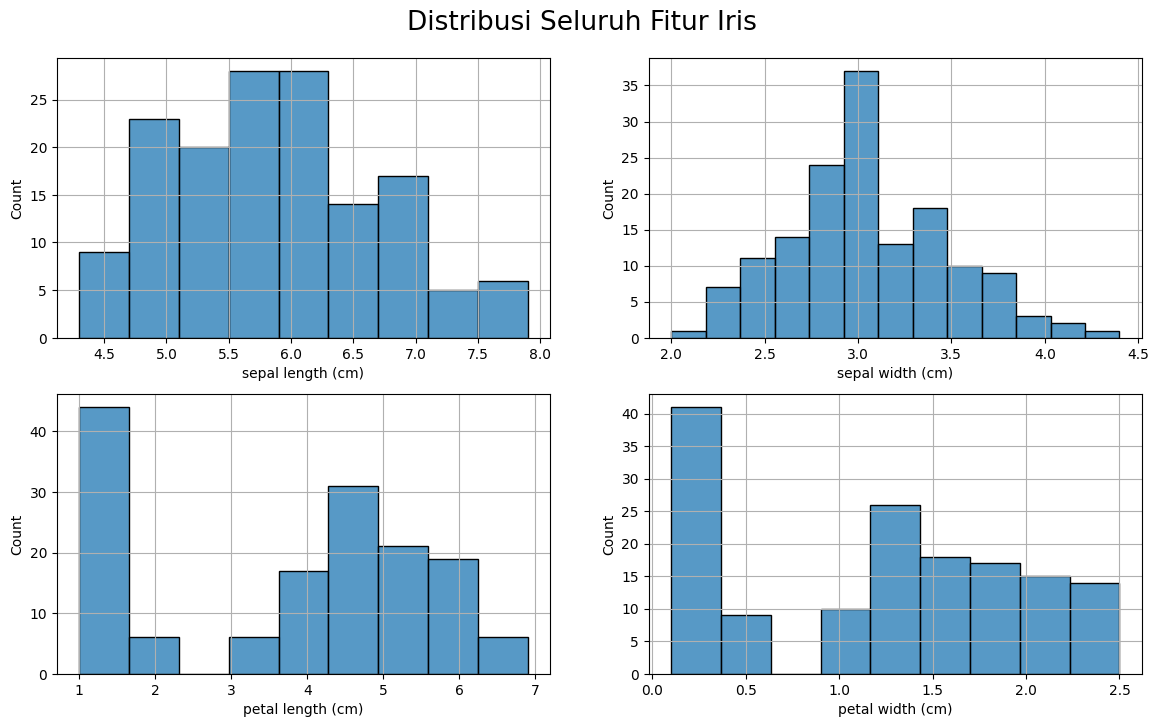

In [62]:
columns = df_iris.columns
fig, axes = plt.subplots(2, 2, figsize=(14,8))

for i, col in enumerate(columns):
    row_position = i // 2
    col_position = i % 2
    sns.histplot(df_iris[col], ax=axes[row_position, col_position])
    axes[row_position, col_position].grid(True)

plt.suptitle('Distribusi Seluruh Fitur Iris', fontsize=19, y=0.94)


In [72]:
for col in df_iris.columns:
    print(5*'=','Fitur ', col, 5*'=', '\n')
    shapiro_test(df_iris[col])
    jarque_bera_test(df_iris[col])
    kolmogorov_test(df_iris[col])

===== Fitur  sepal length (cm) ===== 

### Shapiro Wilk Test Result ###
statistic :  0.9760902723490532 
p-value : 0.010181161454691156 
result : Data tidak berdistribusi normal (tolak H0) 

### Jarque-Bera Test Result ###
statistic :  4.4858754373509475 
p-value : 0.1061462181718774 
result : Data berdistribusi normal (gagal tolak H0) 

### Kolmogorov-Smirnov Test Result ###
statistic :  0.999991460094529 
p-value : 0.0 
result : Data tidak berdistribusi normal (tolak H0) 

===== Fitur  sepal width (cm) ===== 

### Shapiro Wilk Test Result ###
statistic :  0.9849178695056319 
p-value : 0.10115426916130282 
result : Data berdistribusi normal (gagal tolak H0) 

### Jarque-Bera Test Result ###
statistic :  2.6974243080415983 
p-value : 0.25957433724664136 
result : Data berdistribusi normal (gagal tolak H0) 

### Kolmogorov-Smirnov Test Result ###
statistic :  0.9794298858198347 
p-value : 1.9343513094431716e-253 
result : Data tidak berdistribusi normal (tolak H0) 

===== Fitur  petal l